In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read the data
data = pd.read_csv('blogs_categories.csv')

In [3]:
data.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [4]:
data.shape

(19997, 3)

In [5]:
#check for null values
data.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [6]:
data['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [7]:
# Distribution of categories
print(data['Labels'].value_counts())

alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: Labels, dtype: int64


In [8]:
# Length of blog posts
data['text_length'] = data['Data'].apply(len)
print(data['text_length'].describe())

count     19997.000000
mean       2306.974196
std        3912.979447
min         345.000000
25%        1139.000000
50%        1600.000000
75%        2321.000000
max      161040.000000
Name: text_length, dtype: float64


array([[<Axes: title={'center': 'alt.atheism'}>,
        <Axes: title={'center': 'comp.graphics'}>,
        <Axes: title={'center': 'comp.os.ms-windows.misc'}>,
        <Axes: title={'center': 'comp.sys.ibm.pc.hardware'}>],
       [<Axes: title={'center': 'comp.sys.mac.hardware'}>,
        <Axes: title={'center': 'comp.windows.x'}>,
        <Axes: title={'center': 'misc.forsale'}>,
        <Axes: title={'center': 'rec.autos'}>],
       [<Axes: title={'center': 'rec.motorcycles'}>,
        <Axes: title={'center': 'rec.sport.baseball'}>,
        <Axes: title={'center': 'rec.sport.hockey'}>,
        <Axes: title={'center': 'sci.crypt'}>],
       [<Axes: title={'center': 'sci.electronics'}>,
        <Axes: title={'center': 'sci.med'}>,
        <Axes: title={'center': 'sci.space'}>,
        <Axes: title={'center': 'soc.religion.christian'}>],
       [<Axes: title={'center': 'talk.politics.guns'}>,
        <Axes: title={'center': 'talk.politics.mideast'}>,
        <Axes: title={'center': 'ta

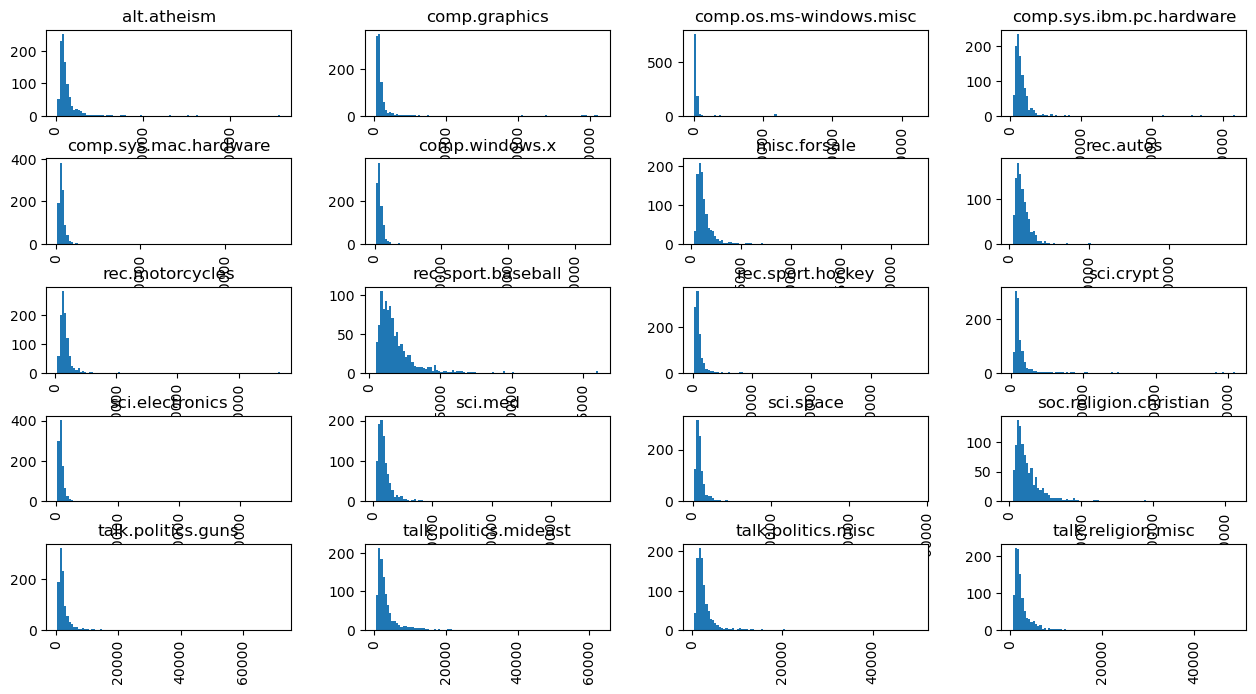

In [10]:
#draw histogram
data.hist('text_length',by='Labels',figsize=(15,8),bins=100)

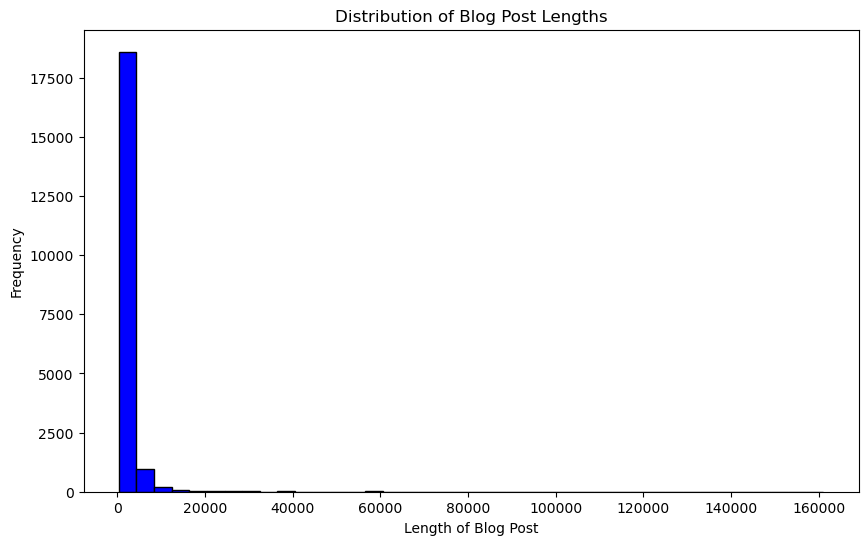

In [11]:
#checking for distribution of default
plt.figure(figsize=(10, 6))
plt.hist(data['text_length'], bins=40, color='blue', edgecolor='black')
plt.title('Distribution of Blog Post Lengths')
plt.xlabel('Length of Blog Post')
plt.ylabel('Frequency')
plt.show()

In [12]:
#Data Cleaning
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data['cleaned_data'] = data['Data'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sheetal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
data.head()

,Unnamed: 0,Data,Labels,text_length,cleaned_data
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,12424,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,32530,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,4550,newsgroups altatheism path cantaloupesrvcscmue...
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,2067,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,1347,xref cantaloupesrvcscmuedu altatheism51121 soc...


In [14]:
print(data.loc[0, 'Data'])

Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew
From: mathew <mathew@mantis.co.uk>
Newsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers
Subject: Alt.Atheism FAQ: Atheist Resources
Summary: Books, addresses, music -- anything related to atheism
Keywords: FAQ, atheism, books, music, fiction, addresses, contacts
Message-ID: <19930329115719@mantis.co.uk>
Date: Mon, 29 Mar 1993 11:57:19 GMT
Expires: Thu, 29 Apr 1993 11:57:19 GMT
Followup-To: alt.atheism
Distribution: world
Organization: Mantis Consultants, Cambridge. UK.
Approved: news-answers-request@mit.edu
Supersedes: <19930301143317@mantis.co.uk>
Lines: 290

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December

In [15]:
print(data.loc[0, 'cleaned_data'])

xref cantaloupesrvcscmuedu altatheism49960 altatheismmoderated713 newsanswers7054 altanswers126 path cantaloupesrvcscmueducrabapplesrvcscmuedubb3andrewcmuedunewsseicmueducisohiostateedumagnusacsohiostateeduusenetinscwrueduagatespoolmueduuunetpipexibmpcugmantismathew mathew mathewmantiscouk newsgroups altatheismaltatheismmoderatednewsanswersaltanswers subject altatheism faq atheist resources summary books addresses music anything related atheism keywords faq atheism books music fiction addresses contacts messageid 19930329115719mantiscouk date mon 29 mar 1993 115719 gmt expires thu 29 apr 1993 115719 gmt followupto altatheism distribution world organization mantis consultants cambridge uk approved newsanswersrequestmitedu supersedes 19930301143317mantiscouk lines 290 archivename atheismresources altatheismarchivename resources lastmodified 11 december 1992 version 10 atheist resources addresses atheist organizations usa freedom religion foundation darwin fish bumper stickers assorted at

In [16]:
#feature extraction using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
x = tfidf.fit_transform(data['cleaned_data']).toarray()
y = data['Labels']

In [17]:
#split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [18]:
print('x_train : ',len(x_train))
print('x_test : ',len(x_test))
print('y_train : ',len(y_train))
print('y_test : ',len(y_test))

x_train :  15997
x_test :  4000
y_train :  15997
y_test :  4000


In [19]:
#performing Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Make predictions
y_pred = nb.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(classification_report(y_test, y_pred))


Accuracy: 0.87525
Precision: 0.8749084984480978
Recall: 0.87525
F1-Score: 0.8731641027765688
                          precision    recall  f1-score   support

             alt.atheism       0.70      0.78      0.74       173
           comp.graphics       0.76      0.88      0.82       179
 comp.os.ms-windows.misc       0.87      0.87      0.87       226
comp.sys.ibm.pc.hardware       0.84      0.80      0.82       204
   comp.sys.mac.hardware       0.87      0.92      0.90       205
          comp.windows.x       0.93      0.91      0.92       186
            misc.forsale       0.83      0.87      0.85       190
               rec.autos       0.91      0.92      0.91       203
         rec.motorcycles       0.98      0.92      0.95       218
      rec.sport.baseball       0.96      0.97      0.97       192
        rec.sport.hockey       0.98      0.98      0.98       203
               sci.crypt       0.95      0.94      0.94       200
         sci.electronics       0.93      0.88   

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Analyze sentiments
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['Data'].apply(get_sentiment)
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sheetal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Unnamed: 0                                               Data       Labels  \
0           0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  alt.atheism   
1           1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
2           2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism   
3           3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   
4           4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  alt.atheism   

   text_length                                       cleaned_data sentiment  
0        12424  xref cantaloupesrvcscmuedu altatheism49960 alt...  positive  
1        32530  xref cantaloupesrvcscmuedu altatheism51060 alt...  positive  
2         4550  newsgroups altatheism path cantaloupesrvcscmue...  negative  
3         2067  xref cantaloupesrvcscmuedu altatheism51120 alt...  positive  
4         1347  xref cantaloupesrvcscmuedu altatheism51121 soc...  negative  


In [21]:
# Distribution of sentiments
print(data['sentiment'].value_counts())

# Sentiment distribution across categories
sentiment_distribution = data.groupby(['Labels','sentiment']).size().unstack(fill_value=0)
print(sentiment_distribution)

positive    13307
negative     6199
neutral       491
Name: sentiment, dtype: int64
sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                    379        8       613
comp.graphics                  123       47       830
comp.os.ms-windows.misc        204       45       751
comp.sys.ibm.pc.hardware       218       19       763
comp.sys.mac.hardware          243       47       710
comp.windows.x                 226       40       734
misc.forsale                   126       70       804
rec.autos                      304       28       668
rec.motorcycles                311       20       669
rec.sport.baseball             228       39       733
rec.sport.hockey               259       16       725
sci.crypt                      300        7       693
sci.electronics                178       36       786
sci.med                        346       22       632
sci.space                      271       21       70